In [ ]:
!pip install tensorflow
!pip install keras
!pip install scikit-learn

In [ ]:
!pip install keras.utils


  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2656 sha256=22fe74e428d6acae407144f92f883fef059df2d27b184dac0b8b2f6f56300232
  Stored in directory: /root/.cache/pip/wheels/d0/dd/3b/493952a5240d486a83805d65360dedadbadeae71d25e2c877f
Successfully built keras.utils
Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package keras.utils
E: Couldn't find any package by glob 'keras.utils'
E: Couldn't find any package by regex 'keras.utils'


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout

In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

In [ ]:
! unzip gtsrb-german-traffic-sign

In [ ]:
imgs_path = "/content/Train"
data = []
labels = []
classes = 43
for i in range(classes):
    img_path = os.path.join(imgs_path, str(i)) #0-42
    for img in os.listdir(img_path):
        im = Image.open(img_path + '/' + img)
        im = im.resize((30,30))
        im = np.array(im)
        data.append(im)
        labels.append(i)
data = np.array(data)
labels = np.array(labels)
print("success")

success


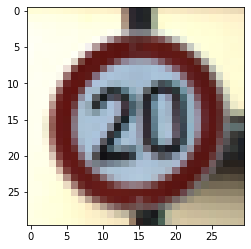

In [ ]:
path = "/content/Train/0/00000_00004_00029.png"
img = Image.open(path)
img = img.resize((30, 30))
sr = np.array(img) 
plt.imshow(img)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print("training shape: ",x_train.shape, y_train.shape)
print("testing shape: ",x_test.shape, y_test.shape)
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

training shape:  (31367, 30, 30, 3) (31367,)
testing shape:  (7842, 30, 30, 3) (7842,)


In [ ]:
!pip install Sequential

  Created wheel for Sequential: filename=sequential-1.0.0-py3-none-any.whl size=2880 sha256=59f352338c799ee9ea56d273d542b024074cbaac6f8b46a2854b4c49d939fe82
  Stored in directory: /root/.cache/pip/wheels/36/1a/15/0286e549c5261b90879e5e7baa6ce8544d8c32db1d61b62e0a
Successfully built Sequential


In [ ]:
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu", input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation="softmax"))

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
epochs = 15
history = model.fit(x_train, y_train, epochs=epochs, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/15
491/491 [==============================] - 124s 250ms/step - loss: 2.3803 - accuracy: 0.3927 - val_loss: 1.0559 - val_accuracy: 0.6998
Epoch 2/15
491/491 [==============================] - 123s 251ms/step - loss: 0.9935 - accuracy: 0.7043 - val_loss: 0.4392 - val_accuracy: 0.8786
Epoch 3/15
491/491 [==============================] - 123s 251ms/step - loss: 0.6476 - accuracy: 0.8030 - val_loss: 0.2621 - val_accuracy: 0.9294
Epoch 4/15
491/491 [==============================] - 123s 250ms/step - loss: 0.4491 - accuracy: 0.8628 - val_loss: 0.1846 - val_accuracy: 0.9450
Epoch 5/15
491/491 [==============================] - 123s 250ms/step - loss: 0.3543 - accuracy: 0.8939 - val_loss: 0.1273 - val_accuracy: 0.9630
Epoch 6/15
491/491 [==============================] - 122s 249ms/step - loss: 0.3112 - accuracy: 0.9071 - val_loss: 0.1072 - val_accuracy: 0.9702
Epoch 7/15
491/491 [==============================] - 123s 250ms/step - loss: 0.2478 - accuracy: 0.9242 - val_loss: 0.0794 -

In [ ]:
from sklearn.metrics import accuracy_score
from pandas import read_csv
test = pd.read_csv("/content/Test.csv")
test.head()
test_labels = test['ClassId'].values
test_img_path = "/content"
test_imgs = test['Path'].values
test_data = []
test_labels = []
for img in test_imgs:
    im = Image.open(test_img_path + '/' + img)
    im = im.resize((30,30))
    im = np.array(im)
    test_data.append(im)
test_data = np.array(test_data)
predictions = model.predict(test_data)
p1 = np.argmax(predictions,axis=1)
print(test_labels)

[]


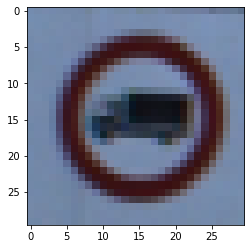

In [ ]:
path = "/content/Test/00000.png"
img = Image.open(path)
img = img.resize((30, 30))
sr = np.array(img) 
plt.imshow(img)
plt.show()


In [ ]:
model.save('traffic_classifier.h5')

In [ ]:
### CREATE VIRTUAL DISPLAY ###
!apt-get install -y xvfb # Install X Virtual Frame Buffer
import os
os.system('Xvfb :1 -screen 0 1600x1200x16  &')    # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8
os.environ['DISPLAY']=':1.0'    # tell X clients to use our virtual DISPLAY :1.0.

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  xvfb
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 784 kB of archives.
After this operation, 2,270 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.9 [784 kB]
Fetched 784 kB in 1s (1,061 kB/s)
Selecting previously unselected package xvfb.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../xvfb_2%3a1.19.6-1ubuntu4.9_amd64.deb ...
Unpacking xvfb (2:1.19.6-1ubuntu4.9) ...
Setting up xvfb (2:1.19.6-1ubuntu4.9) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [ ]:
from tkinter import filedialog
from tkinter import *
import tkinter as tk
from PIL import ImageTk, Image
from keras.models import load_model
import numpy as np
#load the trained model to classify traffic signs
model = load_model('traffic_classifier.h5')
#dictionary to label all traffic signs class.
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)',
            3:'Speed limit (50km/h)',
            4:'Speed limit (60km/h)',
            5:'Speed limit (70km/h)',
            6:'Speed limit (80km/h)',
            7:'End of speed limit (80km/h)',
            8:'Speed limit (100km/h)',
            9:'Speed limit (120km/h)',
            10:'No passing',
            11:'No passing veh over 3.5 tons',
            12:'Right-of-way at intersection',
            13:'Priority road',
            14:'Yield',
            15:'Stop',
            16:'No vehicles',
            17:'Veh > 3.5 tons prohibited',
            18:'No entry',
            19:'General caution',
            20:'Dangerous curve left',
            21:'Dangerous curve right',
            22:'Double curve',
            23:'Bumpy road',
            24:'Slippery road',
            25:'Road narrows on the right',
            26:'Road work',
            27:'Traffic signals',
            28:'Pedestrians',
            29:'Children crossing',
            30:'Bicycles crossing',
            31:'Beware of ice/snow',
            32:'Wild animals crossing',
            33:'End speed + passing limits',
            34:'Turn right ahead',
            35:'Turn left ahead',
            36:'Ahead only',
            37:'Go straight or right',
            38:'Go straight or left',
            39:'Keep right',
            40:'Keep left',
            41:'Roundabout mandatory',
            42:'End of no passing',
            43:'End no passing veh > 3.5 tons' }
#initialize GUI
top=tk.Tk()
top.geometry('800x600')
top.title('Traffic sign classification')
top.configure(background='#CDCDCD')
label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)
def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((30,30))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    pred = model.predict_classes([image])[0]
    sign = classes[pred+1]
    print(sign)
    label.configure(foreground='#011638', text=sign)
def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)
def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass
upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Know Your Traffic Sign",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()